# Introduction to Machine Learning and AI

# Final-Project ：Thinking about Purchasing Stock  Case Study

# Group 2 : Qi Zhang && Xinmeng Liu

## Import relevant packages

In [17]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sn
plt.style.use('ggplot')
from sklearn.impute import SimpleImputer

## Import the data set

In [9]:
FILE1 = "csv_file\Apple.csv"
FILE2 = "csv_file\Microsoft.csv"
df_apple = pd.read_csv(FILE1)
df_Microsoft = pd.read_csv(FILE2)

## Data Cleansing

In [10]:
print(df_apple.isnull().any()) 
print(df_Microsoft.isnull().any()) 
# No value is missing in these 2 data sets

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool
Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool


In [11]:
df_apple = df_apple[df_apple["Date"].str.contains("2020") == False]
df_Microsoft = df_Microsoft[df_Microsoft["Date"].str.contains("2020") == False]
# The 2020 data is not needed at all due to COVID-19 impacts.

### The basic info of Apple stock

In [15]:
print(df_apple.info())
print(df_apple.describe())
print(df_apple.head())
print(df_apple.corr())
print(df_apple.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10248 entries, 0 to 10500
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10248 non-null  object 
 1   Open       10248 non-null  float64
 2   High       10248 non-null  float64
 3   Low        10248 non-null  float64
 4   Close      10248 non-null  float64
 5   Adj Close  10248 non-null  float64
 6   Volume     10248 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 640.5+ KB
None
               Open          High           Low         Close     Adj Close  \
count  10248.000000  10248.000000  10248.000000  10248.000000  10248.000000   
mean      13.199479     13.339672     13.061867     13.206506     12.570622   
std       30.388313     30.738308     30.062666     30.418153     30.107344   
min        0.049665      0.049665      0.049107      0.049107      0.038276   
25%        0.276786      0.283549      0.269208      0.276786      0

### The basic info of Microsoft stock

In [16]:
print(df_apple.info())
print(df_apple.describe())
print(df_apple.head())
print(df_apple.corr())
print(df_apple.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10248 entries, 0 to 10500
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10248 non-null  object 
 1   Open       10248 non-null  float64
 2   High       10248 non-null  float64
 3   Low        10248 non-null  float64
 4   Close      10248 non-null  float64
 5   Adj Close  10248 non-null  float64
 6   Volume     10248 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 640.5+ KB
None
               Open          High           Low         Close     Adj Close  \
count  10248.000000  10248.000000  10248.000000  10248.000000  10248.000000   
mean      13.199479     13.339672     13.061867     13.206506     12.570622   
std       30.388313     30.738308     30.062666     30.418153     30.107344   
min        0.049665      0.049665      0.049107      0.049107      0.038276   
25%        0.276786      0.283549      0.269208      0.276786      0

### check the correlations through heatmap 

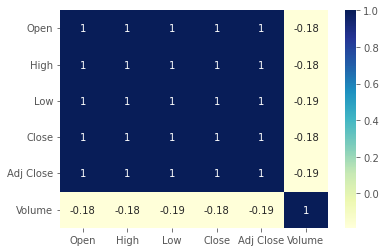

In [21]:
dataplot=sn.heatmap(df_apple.corr(),cmap='YlGnBu',annot=True)

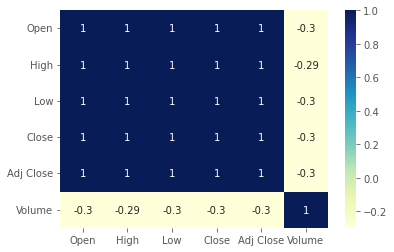

In [20]:
dataplot=sn.heatmap(df_Microsoft.corr(),cmap='YlGnBu',annot=True)

# Analysis

## Profit analysis

In [75]:
df_apple_profit = df_apple.drop(columns=['High','Low','Adj Close'])
df_Microsoft_profit = df_Microsoft.drop(columns=['High','Low','Adj Close'])



df_apple_profit['profitable'] = df_apple_profit['Open'] - df_apple_profit['Close']
df_Microsoft_profit['profitable'] = df_Microsoft_profit['Open'] - df_Microsoft_profit['Close']

# def preprocess(df):
#     temp = df.copy()
#     temp["profitable"].loc[temp["profitable"] > 0] = 1
#     df = temp
#     return df
# preprocess(df_apple_profit)

C:\Users\Marsy\AppData\Local\Temp\ipykernel_1844\3228301500.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["profitable"].loc[temp["profitable"] > 0] = 1


,Date,Open,Close,Volume,profitable
0,1980-12-12,0.128348,0.128348,469033600,0.000000
1,1980-12-15,0.122210,0.121652,175884800,1.000000
2,1980-12-16,0.113281,0.112723,105728000,1.000000
3,1980-12-17,0.115513,0.115513,86441600,0.000000
4,1980-12-18,0.118862,0.118862,73449600,0.000000
...,...,...,...,...,...
10496,2022-08-01,161.009995,161.509995,67829400,-0.500000
10497,2022-08-02,160.100006,160.009995,59907000,1.000000
10498,2022-08-03,160.839996,166.130005,82507500,-5.290009
10499,2022-08-04,166.009995,165.809998,55474100,1.000000


In [68]:
df_apple_profit

,Date,Open,Close,Volume,profitable
0,1980-12-12,0.128348,0.128348,469033600,0.000000
1,1980-12-15,0.122210,0.121652,175884800,0.000558
2,1980-12-16,0.113281,0.112723,105728000,0.000558
3,1980-12-17,0.115513,0.115513,86441600,0.000000
4,1980-12-18,0.118862,0.118862,73449600,0.000000
...,...,...,...,...,...
10496,2022-08-01,161.009995,161.509995,67829400,-0.500000
10497,2022-08-02,160.100006,160.009995,59907000,0.090011
10498,2022-08-03,160.839996,166.130005,82507500,-5.290009
10499,2022-08-04,166.009995,165.809998,55474100,0.199997
